### Importação dos dados



In [1]:
import pandas as pd
import matplotlib.pyplot as plt

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [2]:
# Soma do faturamento por loja:
vendas_por_loja = pd.DataFrame({'Lojas': ['Loja 1','Loja 2','Loja 3','Loja 4'],
    'Vendas': [
        loja["Preço"].sum(),
        loja2["Preço"].sum(),
        loja3["Preço"].sum(),
        loja4["Preço"].sum()
    ]
})

# Resultado do faturamento por loja:
print("\nVendas totais por loja (ordenadas de forma decrescente):\n")
vendas_por_loja.sort_values(by='Vendas', ascending=False)


Vendas totais por loja (ordenadas de forma decrescente):



,Lojas,Vendas
0,Loja 1,1534509.12
1,Loja 2,1488459.06
2,Loja 3,1464025.03
3,Loja 4,1384497.58


# 2. Vendas por Categoria


In [3]:
# Agrupando as vendas por categoria de produto em cada loja
categoria_loja1 = loja.groupby('Categoria do Produto')['Preço'].sum()
categoria_loja2 = loja2.groupby('Categoria do Produto')['Preço'].sum()
categoria_loja3 = loja3.groupby('Categoria do Produto')['Preço'].sum()
categoria_loja4 = loja4.groupby('Categoria do Produto')['Preço'].sum()

# Juntando os dados em um único DataFrame
vendas_categoria = pd.DataFrame({
    'Loja 1': categoria_loja1,
    'Loja 2': categoria_loja2,
    'Loja 3': categoria_loja3,
    'Loja 4': categoria_loja4
})

# Somando as vendas totais por categoria
vendas_categoria['Total'] = vendas_categoria.sum(axis=1)

In [4]:
# vendas por categoria de produto em cada loja

print("\nVendas por categoria de produto em cada loja:\n")
vendas_categoria.sort_values(by='Total', ascending=False)


Vendas por categoria de produto em cada loja:



,Loja 1,Loja 2,Loja 3,Loja 4,Total
Categoria do Produto,,,,,
eletronicos,572659.23,547773.71,547699.92,545966.86,2214099.72
eletrodomesticos,484913.36,464758.13,438984.89,377680.65,1766337.03
moveis,250178.11,235234.68,268095.56,256705.65,1010214.00
instrumentos musicais,121731.69,139987.03,103174.45,100136.50,465029.67
esporte e lazer,52387.55,46326.09,47456.10,44465.65,190635.39
brinquedos,23993.78,21262.21,25869.20,27015.67,98140.86
utilidades domesticas,16931.48,19662.86,20080.21,20098.83,76773.38
livros,11713.92,13454.35,12664.70,12427.77,50260.74


# 3. Média de Avaliação das Lojas

In [5]:
# Calcular Avaliacao Média das lojas
media_avaliacao_por_loja = pd.DataFrame({
    'Lojas': ['Loja 1','Loja 2','Loja 3','Loja 4'],
    'Avaliação %': [
        loja["Avaliação da compra"].mean(),
        loja2["Avaliação da compra"].mean(),
        loja3["Avaliação da compra"].mean(),
        loja4["Avaliação da compra"].mean()
    ]
})
print("\n Avaliação média por loja (de 1 a 5):\n")
media_avaliacao_por_loja.sort_values(by='Avaliação %', ascending=False).round(2)


 Avaliação média por loja (de 1 a 5):



,Lojas,Avaliação %
2,Loja 3,4.05
1,Loja 2,4.04
3,Loja 4,4.00
0,Loja 1,3.98


# 4. Produtos Mais e Menos Vendidos

In [6]:
# Mostrar os 3 produtos mais vendidos por loja
mais_vendido_loja1 = loja['Produto'].value_counts().head(3).reset_index()
mais_vendido_loja1.columns = ['Produto', 'Qtd']
mais_vendido_loja2 = loja2['Produto'].value_counts().head(3).reset_index()
mais_vendido_loja2.columns = ['Produto', 'Qtd']
mais_vendido_loja3 = loja3['Produto'].value_counts().head(3).reset_index()
mais_vendido_loja3.columns = ['Produto', 'Qtd']
mais_vendido_loja4 = loja4['Produto'].value_counts().head(3).reset_index()
mais_vendido_loja4.columns = ['Produto', 'Qtd']


# Designar MultiIndex nas colunas para cada loja
mais_vendido_loja1.columns = pd.MultiIndex.from_product([['Loja 1'], mais_vendido_loja1.columns])
mais_vendido_loja2.columns = pd.MultiIndex.from_product([['Loja 2'], mais_vendido_loja2.columns])
mais_vendido_loja3.columns = pd.MultiIndex.from_product([['Loja 3'], mais_vendido_loja3.columns])
mais_vendido_loja4.columns = pd.MultiIndex.from_product([['Loja 4'], mais_vendido_loja4.columns])

# Concatenar lado a lado
mais_vendidos_juntas = pd.concat([mais_vendido_loja1, mais_vendido_loja2, mais_vendido_loja3, mais_vendido_loja4], axis=1)
print(f"\n🔝Produtos Mais Vendidos por Loja:\n")
display(mais_vendidos_juntas)


🔝Produtos Mais Vendidos por Loja:



Loja 1                        Loja 2              Loja 3      \
         Produto Qtd                   Produto Qtd         Produto Qtd   
0    Micro-ondas  60  Iniciando em programação  65   Kit banquetas  57   
1  TV Led UHD 4K  60               Micro-ondas  62  Mesa de jantar  56   
2  Guarda roupas  60                   Bateria  61       Cama king  56   

                    Loja 4      
                   Produto Qtd  
0                 Cama box  62  
1                 Faqueiro  59  
2  Dashboards com Power BI  56

In [7]:
# Mostrar os 3 produtos menos vendidos por loja
menos_vendido_loja1 = loja['Produto'].value_counts().tail(3).reset_index()
menos_vendido_loja1.columns = ['Produto', 'Qtd']
menos_vendido_loja2 = loja2['Produto'].value_counts().tail(3).reset_index()
menos_vendido_loja2.columns = ['Produto', 'Qtd']
menos_vendido_loja3 = loja3['Produto'].value_counts().tail(3).reset_index()
menos_vendido_loja3.columns = ['Produto', 'Qtd']
menos_vendido_loja4 = loja4['Produto'].value_counts().tail(3).reset_index()
menos_vendido_loja4.columns = ['Produto', 'Qtd']

# Designar MultiIndex nas colunas para cada loja
menos_vendido_loja1.columns = pd.MultiIndex.from_product([['Loja 1'], menos_vendido_loja1.columns])
menos_vendido_loja2.columns = pd.MultiIndex.from_product([['Loja 2'], menos_vendido_loja2.columns])
menos_vendido_loja3.columns = pd.MultiIndex.from_product([['Loja 3'], menos_vendido_loja3.columns])
menos_vendido_loja4.columns = pd.MultiIndex.from_product([['Loja 4'], menos_vendido_loja4.columns])

# Concatenar lado a lado
menos_vendidos_juntas = pd.concat([menos_vendido_loja1, menos_vendido_loja2, menos_vendido_loja3, menos_vendido_loja4], axis=1)
print(f"\n🔻Produtos Menos Vendidos por Loja:\n")
display(menos_vendidos_juntas)


🔻Produtos Menos Vendidos por Loja:



Loja 1                 Loja 2                Loja 3      \
             Produto Qtd            Produto Qtd           Produto Qtd   
0  Panela de pressão  35     Mesa de jantar  34           Mochila  36   
1            Headset  33         Impressora  34       Micro-ondas  36   
2       Celular ABXY  33  Jogo de tabuleiro  32  Blocos de montar  35   

          Loja 4      
         Produto Qtd  
0         Violão  37  
1  Guarda roupas  34  
2       Guitarra  33

# 5. Frete Médio por Loja


In [8]:
# Calcular o custo médio de frete para cada loja
frete_m_por_loja = pd.DataFrame({
    'Lojas': ['Loja 1','Loja 2','Loja 3','Loja 4'],
    'Média do Frete':[
        loja["Frete"].mean(),
        loja2["Frete"].mean(),
        loja3["Frete"].mean(),
        loja4["Frete"].mean()
    ]})

print("\nMédia do Valor do Frete por Loja:\n")
frete_m_por_loja.sort_values(by='Média do Frete', ascending=False).round(2)


Média do Valor do Frete por Loja:



,Lojas,Média do Frete
0,Loja 1,34.69
1,Loja 2,33.62
2,Loja 3,33.07
3,Loja 4,31.28


In [58]:
# Calcular o gasto total do frete por loja
gasto_total_frete = pd.DataFrame({
    'Lojas': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Total do Frete': [
        loja['Frete'].sum(),
        loja2['Frete'].sum(),
        loja3['Frete'].sum(),
        loja4['Frete'].sum()
]})

print('\nSoma Total do Frete por Loja:\n')
gasto_total_frete


Soma Total do Frete por Loja:



,Lojas,Total do Frete
0,Loja 1,81837.967796
1,Loja 2,79314.158013
2,Loja 3,78022.661223
3,Loja 4,73755.875119


# Análise por gráficos

## Gráfico de Pizza (Análise do Faturamento Total por Loja)

In [44]:
# Função para formatar os rótulos
import locale

def formatar_valor(pct, total):
    valor_absoluto = int(pct / 100. * total)
    return f'R$ {locale.format_string("%d", valor_absoluto, grouping=True)} \n({pct:.1f}%)'

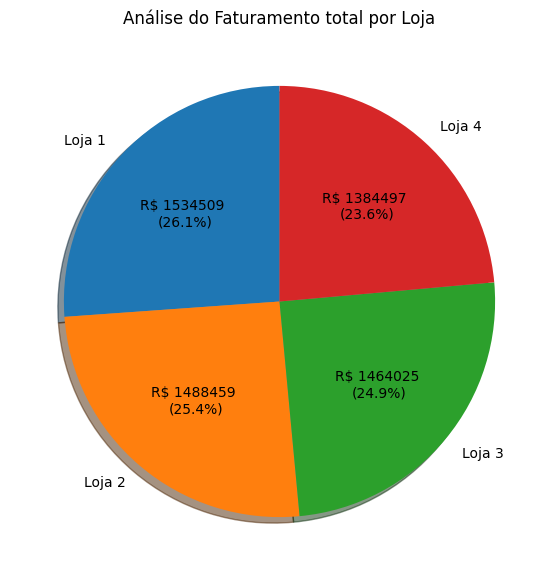

In [45]:
plt.figure(figsize=(7, 7))
plt.pie(vendas_por_loja['Vendas'], labels=vendas_por_loja['Lojas'], autopct=lambda p: formatar_valor(p, vendas_por_loja['Vendas'].sum()),startangle=90,shadow=True)
plt.title('Análise do Faturamento total por Loja')

plt.show()


## Gráfico de Barras (Análise da Média de Avaliação por Loja)

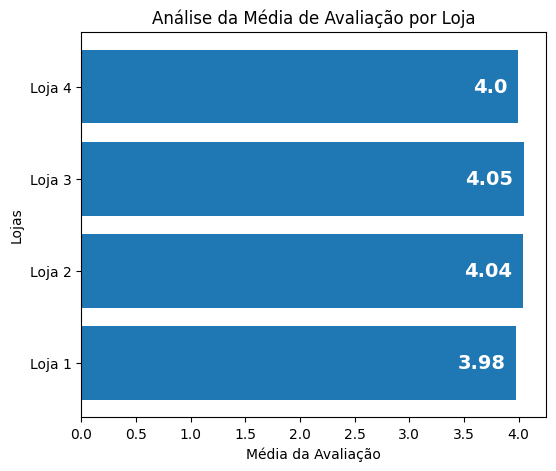

In [49]:
plt.figure(figsize=(6, 5))
plt.barh(media_avaliacao_por_loja["Lojas"], media_avaliacao_por_loja["Avaliação %"])
plt.title('Análise da Média de Avaliação por Loja')
plt.xlabel('Média da Avaliação')
plt.ylabel('Lojas')

# Adicionando os valores dentro das barras
for index, value in enumerate(media_avaliacao_por_loja["Avaliação %"]):
    plt.text(value - 0.1, index, str(round(value,2)), va='center', ha='right', color='white', fontsize=14, fontweight='bold')


## Gráfico de Colunas (Análise da Média de Frete por Loja)

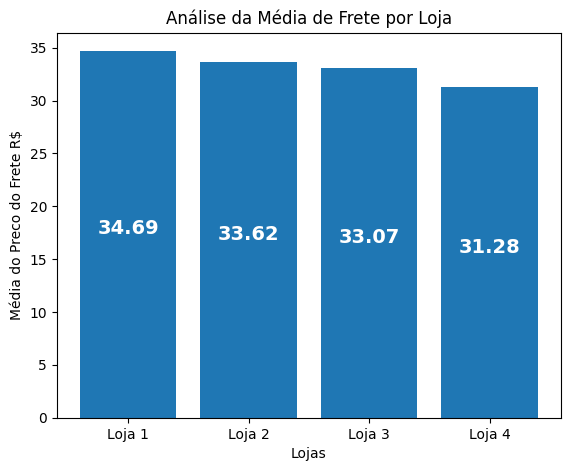

In [52]:
plt.figure(figsize=(6.5, 5))
plt.bar(frete_m_por_loja['Lojas'], frete_m_por_loja['Média do Frete'])
plt.title('Análise da Média de Frete por Loja')

plt.xlabel("Lojas")
plt.ylabel("Média do Preco do Frete R$")
# Inserir os valores dentro de cada barra
for i, valor in enumerate(frete_m_por_loja['Média do Frete']):
    plt.text(i, valor / 2, str(round(valor,2)), ha='center',color='white', fontsize=14, fontweight='bold', rotation=0)


# Relatório Final:

Com base nos resultados da análise, considerando principalmente o faturamento total acumulado entre 2020 e 2023 e as avaliações médias dos clientes, a Loja 4 demonstrou ser a unidade com o desempenho geral mais baixo da rede Alura Store.

Embora a Loja 4 apresente pontos fortes isolados, como um custo de frete competitivo e vendas concentradas em nichos específicos (Brinquedos, Utilidades Domésticas), seu volume total de vendas significativamente inferior às demais e sua posição na penúltima colocação em termos de avaliação média sugerem que esta é a loja com maior potencial para a venda.

Com isso, a recomendação para o Sr. João, com base nos dados analisados, é considerar a venda da Loja 4, alinhando-se ao seu objetivo de levantar capital através da alienação da unidade com menor performance global.